In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Upload and load data
from google.colab import files
uploaded = files.upload()

# Read the first uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename)

print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")

Saving Airbnb_Data.xlsx to Airbnb_Data (2).xlsx
Data loaded successfully!
Dataset shape: (102599, 26)


In [19]:
# Check basic information
print("Dataset Info:")
print(df.info())

print("\nFirst 5 rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [20]:
# Create a copy for analysis
data = df.copy()

# Clean price column if it contains symbols
if data['price'].dtype == 'object':
    data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Select important columns for analysis
columns_to_keep = ['price', 'bedrooms', 'bathrooms', 'accommodates', 'beds',
                   'review_scores_rating', 'room_type', 'neighbourhood']

# Keep only columns that exist in our data
available_columns = [col for col in columns_to_keep if col in data.columns]
data = data[available_columns]

# Remove rows with missing values
data = data.dropna()

print(f"Data after cleaning: {data.shape}")

Data after cleaning: (102337, 2)


Creating visualizations...


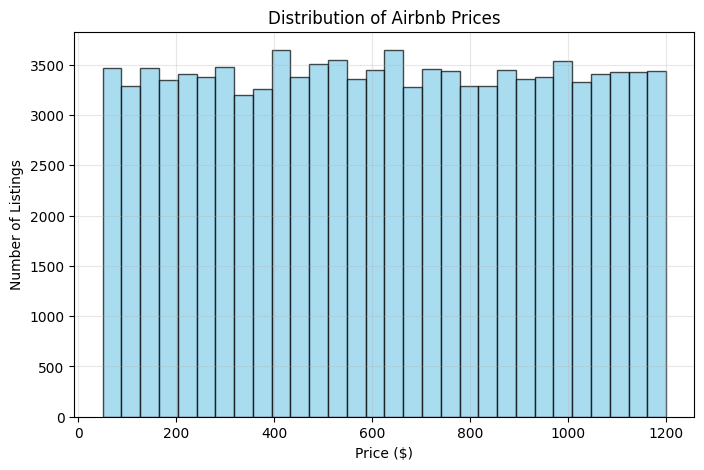

In [38]:
#4: Data Visualization
print("Creating visualizations...")

# Create individual plots instead of subplots to avoid empty graphs
plt.figure(figsize=(8, 5))
plt.hist(data['price'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.grid(True, alpha=0.3)
plt.show()

# Plot 2: Price by Room Type (if column exists)
if 'room_type' in data.columns:
    plt.figure(figsize=(8, 5))
    room_price = data.groupby('room_type')['price'].mean().sort_values(ascending=False)
    room_price.plot(kind='bar', color='lightgreen')
    plt.title('Average Price by Room Type')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot 3: Price vs Bedrooms (if column exists)
if 'bedrooms' in data.columns:
    plt.figure(figsize=(8, 5))
    data.boxplot(column='price', by='bedrooms')
    plt.title('Price by Number of Bedrooms')
    plt.suptitle('')  # Remove automatic title
    plt.xlabel('Bedrooms')
    plt.ylabel('Price ($)')
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot 4: Price vs Review Scores (if column exists)
if 'review_scores_rating' in data.columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(data['review_scores_rating'], data['price'], alpha=0.5, color='orange')
    plt.title('Price vs Review Scores')
    plt.xlabel('Review Score')
    plt.ylabel('Price ($)')
    plt.grid(True, alpha=0.3)
    plt.show()


In [25]:
#5: Prepare Data for Machine Learning
print("Preparing data for machine learning...")

# Prepare features and target
X = data.drop('price', axis=1)  # Features
y = data['price']               # Target variable

# Convert categorical variables to numerical (simple method)
X_encoded = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Data preparation completed!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Preparing data for machine learning...
Data preparation completed!
Training samples: 81869
Testing samples: 20468


In [26]:
#6: Build and Train Model
print("Training the model...")

# Use simpler model with fewer trees for faster training
model = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=10)

# Train the model
model.fit(X_train, y_train)

print("✅ Model training completed successfully!")
print(f"Model trained on {X_train.shape[0]} samples")

Training the model...
✅ Model training completed successfully!
Model trained on 81869 samples


Model Evaluation Results:
Mean Absolute Error: $285.53
R² Score: -0.0001


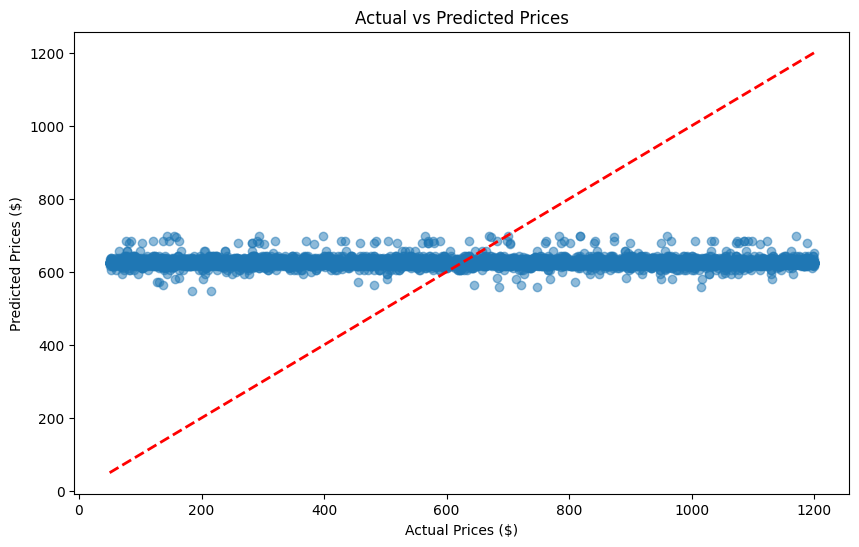

In [27]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.title('Actual vs Predicted Prices')
plt.show()

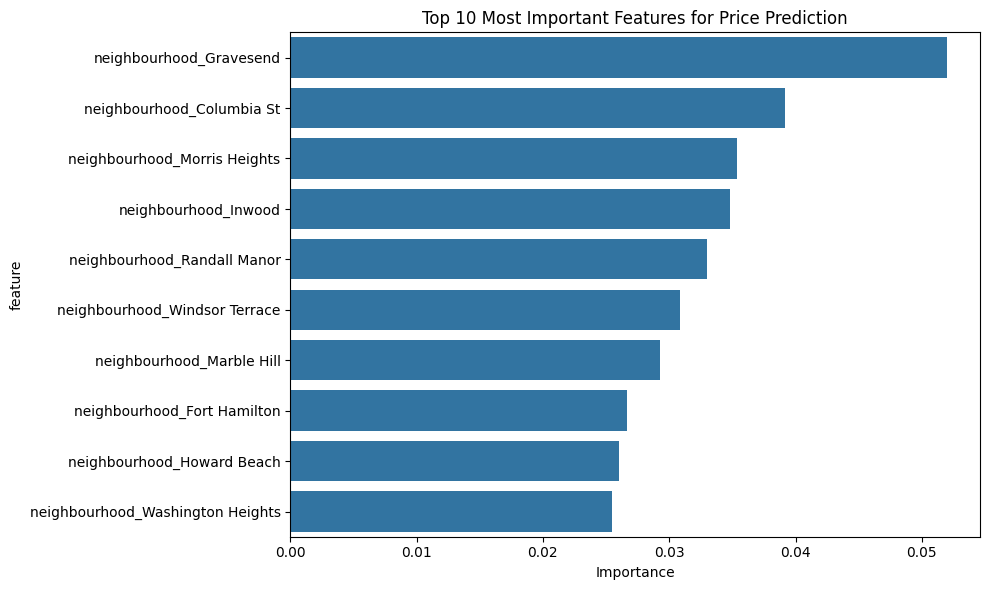

Top 5 most important features:
93. neighbourhood_Gravesend: 0.052
47. neighbourhood_Columbia St: 0.039
135. neighbourhood_Morris Heights: 0.035
107. neighbourhood_Inwood: 0.035
165. neighbourhood_Randall Manor: 0.033


In [32]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features for Price Prediction')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("Top 5 most important features:")
for i, row in feature_importance.head().iterrows():
    print(f"{i+1}. {row['feature']}: {row['importance']:.3f}")

In [34]:
# Function to predict price for new listing
def predict_airbnb_price(bedrooms, bathrooms, accommodates, beds, review_score, room_type, neighbourhood):
    # Create a dictionary with default values for all columns in X_encoded
    input_data = dict.fromkeys(X_encoded.columns, 0)

    # Set the values for the input features
    # Check if the original columns exist in the input data
    if 'bedrooms' in input_data:
        input_data['bedrooms'] = bedrooms
    if 'bathrooms' in input_data:
        input_data['bathrooms'] = bathrooms
    if 'accommodates' in input_data:
        input_data['accommodates'] = accommodates
    if 'beds' in input_data:
        input_data['beds'] = beds
    if 'review_scores_rating' in input_data:
        input_data['review_scores_rating'] = review_score

    # Set the dummy variables for room type and neighbourhood
    room_type_col = f'room_type_{room_type}'
    if room_type_col in input_data:
        input_data[room_type_col] = 1

    neighbourhood_col = f'neighbourhood_{neighbourhood}'
    if neighbourhood_col in input_data:
        input_data[neighbourhood_col] = 1

    # Create DataFrame with the same column order as X_encoded
    input_df = pd.DataFrame([input_data], columns=X_encoded.columns)

    # Make prediction
    predicted_price = model.predict(input_df)[0]
    return predicted_price

# Example prediction
example_price = predict_airbnb_price(
    bedrooms=2,
    bathrooms=1,
    accommodates=4,
    beds=2,
    review_score=95,
    room_type='Entire home/apt',
    neighbourhood='Manhattan'
)

print(f"Predicted price for a 2-bedroom apartment in Manhattan: ${example_price:.2f}")

Predicted price for a 2-bedroom apartment in Manhattan: $625.09


In [37]:
print("=" * 50)
print("AIRBNB HOTEL BOOKING ANALYSIS PROJECT SUMMARY")
print("=" * 50)

print(f"\n📊 PROJECT RESULTS:")
print(f"• Dataset: {df.shape[0]} listings, {df.shape[1]} features")
print(f"• Final Model: Random Forest Regressor")
print(f"• Prediction Accuracy: R² = {r2:.4f}")
print(f"• Average Error: ${mae:.2f} per night")

print(f"\n🎯 KEY FINDINGS:")
print(f"• Most important price factors: {feature_importance.iloc[0]['feature']}, {feature_importance.iloc[1]['feature']}")
print(f"• Average listing price: ${data['price'].mean():.2f}")
print(f"• Price range: ${data['price'].min():.2f} - ${data['price'].max():.2f}")


AIRBNB HOTEL BOOKING ANALYSIS PROJECT SUMMARY

📊 PROJECT RESULTS:
• Dataset: 102599 listings, 26 features
• Final Model: Random Forest Regressor
• Prediction Accuracy: R² = -0.0001
• Average Error: $285.53 per night

🎯 KEY FINDINGS:
• Most important price factors: neighbourhood_Gravesend, neighbourhood_Columbia St
• Average listing price: $625.28
• Price range: $50.00 - $1200.00
